# Data Analysis and Regression Modeling for Car Prices

We have developed a regression model using a Random Forest algorithm to __predict car prices__. The model's performance is evaluated, and feature importances are analyzed to understand the *significant factors* influencing car prices.

 ### Importing Required Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# from pandasgui import show -----> Optional
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### Loading the Dataset

In [34]:
df = pd.read_csv("car_final.csv")
df

,Brand,YearOfConstruction,LifeSpan,EngineCondition,ChassisCondition,BodyCondition,InsuranceDeadline,Gearbox,Fuel,Price
0,کیا موهاوی 8 سیلندر,1390,82000,سالم,سالم و پلمپ,سالم و بی‌خط و خش,6,اتوماتیک,بنزینی,4170000000
1,جک S5,1399,25000,سالم,سالم و پلمپ,سالم و بی‌خط و خش,6,اتوماتیک,بنزینی,1700000000
2,پژو 206 تیپ 2,1397,140000,سالم,سالم و پلمپ,رنگ‌شدگی، در 2 ناحیه,0,دنده‌ای,بنزینی,438000000
3,پراید 111 SE,1396,117000,سالم,سالم و پلمپ,سالم و بی‌خط و خش,1,دنده‌ای,بنزینی,284000000
4,رنو تندر 90 E2,1395,94000,سالم,سالم و پلمپ,سالم و بی‌خط و خش,5,دنده‌ای,بنزینی,613000000
...,...,...,...,...,...,...,...,...,...,...
36160,لاماری ایما,1402,0,سالم,سالم و پلمپ,سالم و بی‌خط و خش,12,اتوماتیک,بنزینی,2500000000
36161,فونیکس FX اکسلنت,1401,0,سالم,سالم و پلمپ,سالم و بی‌خط و خش,12,اتوماتیک,بنزینی,1111111111
36162,هیوندای اکسنت ساده,1394,145000,سالم,سالم و پلمپ,سالم و بی‌خط و خش,11,اتوماتیک,بنزینی,1530000000
36163,پراید صندوق‌دار,1386,225000,سالم,سالم و پلمپ,رنگ‌شدگی,6,دنده‌ای,دوگانه‌سوز شرکتی,173000000


### Checking for Null Values
We check for missing values in the dataset using the isnull().sum() method to ensure the integrity of the data.

In [3]:
df.isnull().sum()

Brand                 0
YearOfConstruction    0
LifeSpan              0
EngineCondition       0
ChassisCondition      0
BodyCondition         0
InsuranceDeadline     0
Gearbox               0
Fuel                  0
Price                 0
dtype: int64

### Exploratory Data Analysis
We display the basic information about the dataset using the df.info() method to get an overview of the columns and their data types.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36165 entries, 0 to 36164
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brand               36165 non-null  object
 1   YearOfConstruction  36165 non-null  int64 
 2   LifeSpan            36165 non-null  int64 
 3   EngineCondition     36165 non-null  object
 4   ChassisCondition    36165 non-null  object
 5   BodyCondition       36165 non-null  object
 6   InsuranceDeadline   36165 non-null  int64 
 7   Gearbox             36165 non-null  object
 8   Fuel                36165 non-null  object
 9   Price               36165 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 2.8+ MB


In [35]:
unique_counts = df.nunique()
unique_counts

Brand                  797
YearOfConstruction      37
LifeSpan              1929
EngineCondition          3
ChassisCondition         3
BodyCondition           10
InsuranceDeadline       13
Gearbox                  2
Fuel                     4
Price                 1772
dtype: int64

### Selecting Integer Columns and Creating a Correlation Matrix
We select only the integer columns from the dataset and create a correlation matrix to examine the relationships between the features. The correlation matrix is visualized as a heatmap using seaborn and matplotlib.

<Axes: >

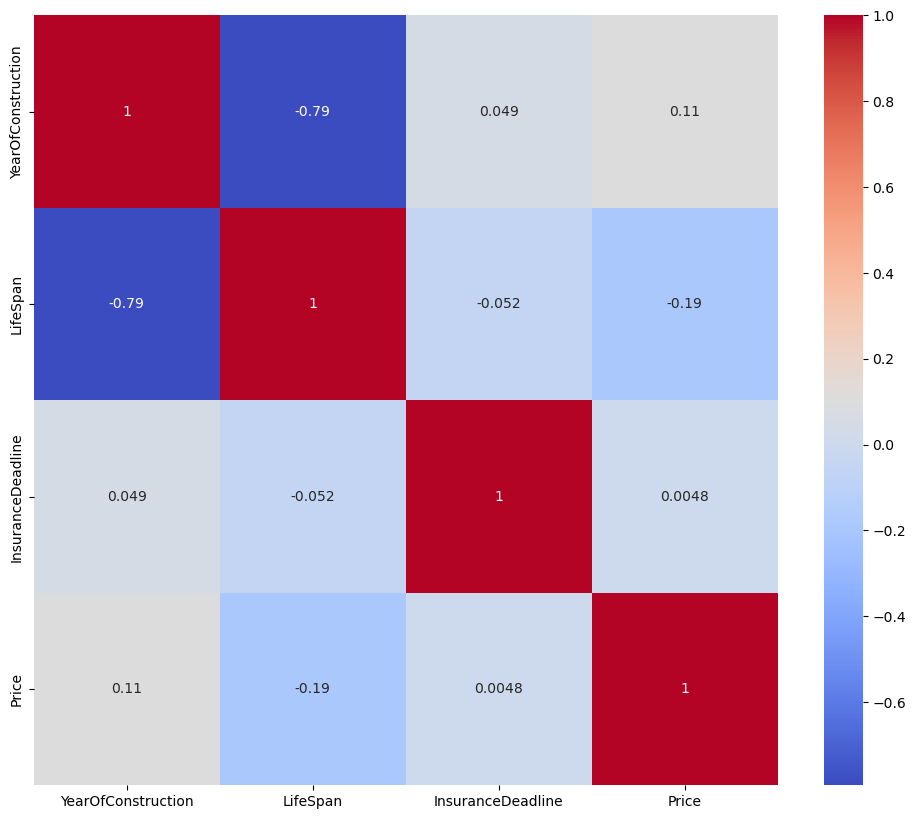

In [5]:
int_cols = df.select_dtypes(include=["int64", "float64"]).columns
int_df = df[int_cols]

corr_matrix = int_df.corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

### Data Preprocessing
We split the dataset into features (X) and the target variable (y). Categorical columns are encoded using LabelEncoder, and the encoded columns are converted to float64 data type.

In [6]:
X = df.drop(columns="Price")
y = df["Price"].astype(float)

cat_cols = X.columns
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])
    
cat_cols = X.select_dtypes(include=["uint8", "uint16"]).columns
X[cat_cols] = X[cat_cols].astype("float64")

### Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

### Training a Random Forest Regressor
We train a Random Forest regressor using the RandomForestRegressor class from sklearn.ensemble. The hyperparameters n_estimators and max_depth are set to 150 and 500, respectively.

In [8]:
rf = RandomForestRegressor(n_estimators=150, max_depth=500, random_state=620)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=500, n_estimators=150, random_state=620)

### Model Evaluation
The performance of the trained model is evaluated by predicting car prices on the test set and calculating metrics such as R-squared(R^2), mean squared error (MSE), and mean absolute error (MAE).

In [9]:
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("R-squared: {:.3f}".format(r2))
print("MSE: {:.2f}".format(mse))
print("MAE: {:.2f}".format(mae))

R-squared: 0.891
MSE: 115556058841774528.00
MAE: 100103601.33


### Residual Analysis
Residuals (the differences between predicted and actual car prices) are calculated. The distribution of residuals is visualized using a histogram to check if the model assumptions hold.

c:\Users\PC\miniconda3\envs\cpu\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


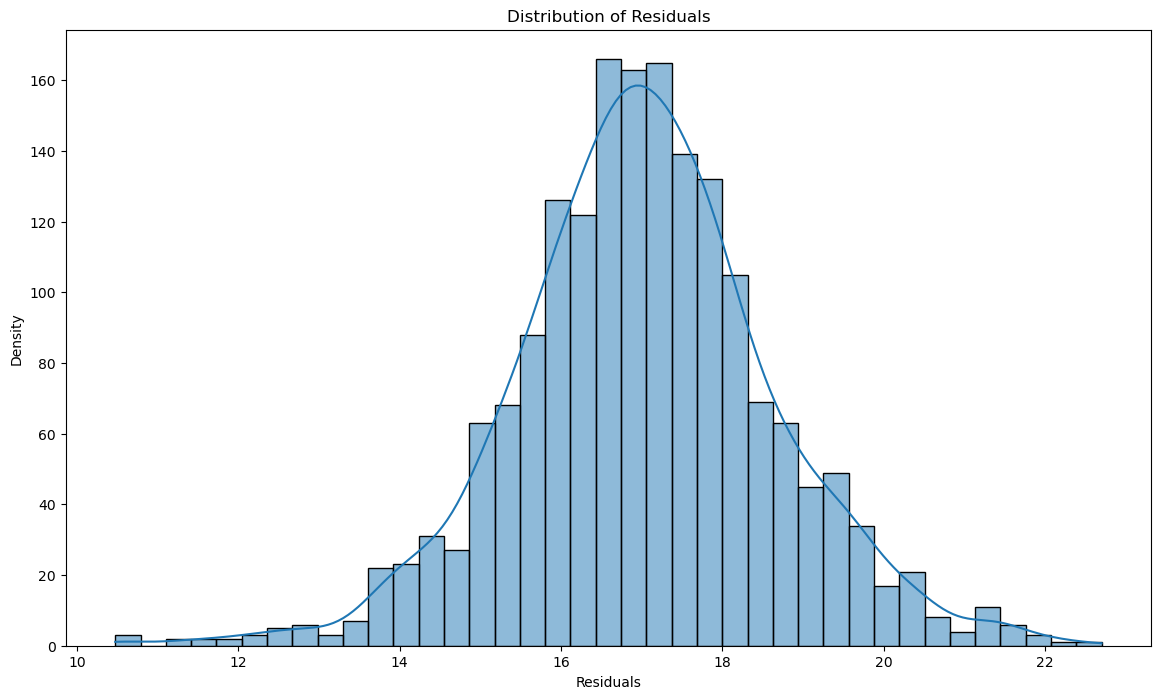

In [10]:
residuals = y_test - y_pred
plt.figure(figsize=(14, 8))
sns.histplot(np.log(residuals), kde=True)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Distribution of Residuals")
plt.show()

### Handling Outliers
Outliers in residuals exceeding a threshold of 50,000,000 are identified and visualized using histograms. These outliers indicate significant deviations between predicted and actual prices.

c:\Users\PC\miniconda3\envs\cpu\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


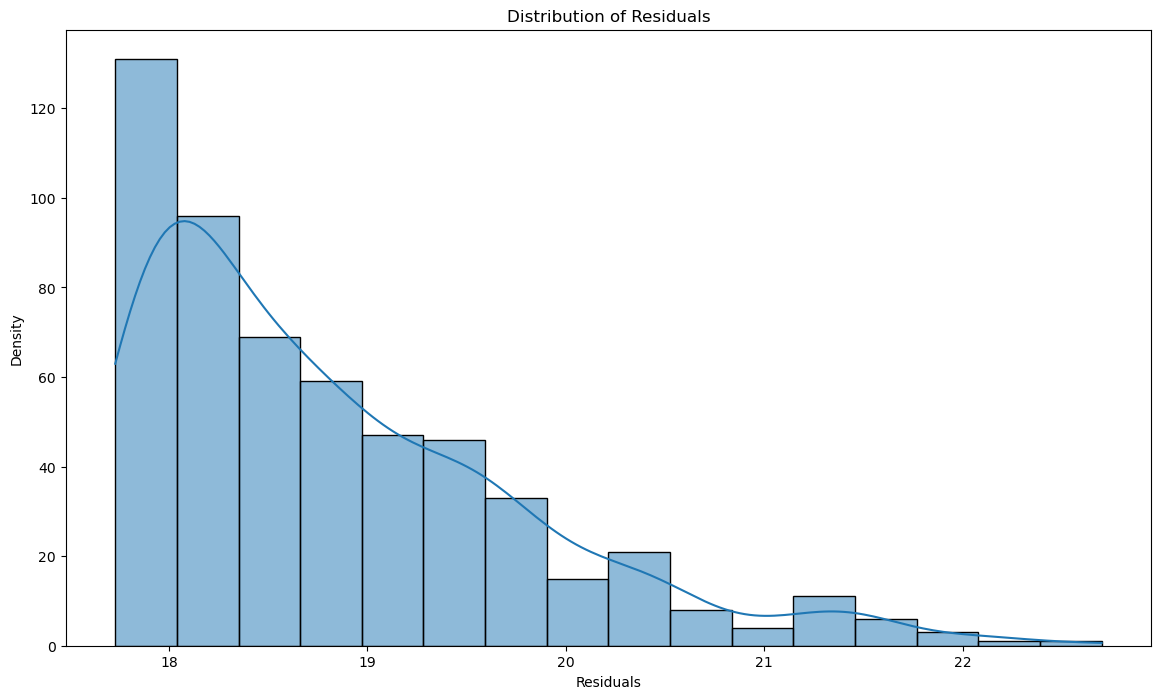

In [11]:
outliers = residuals[abs(residuals) >= 50000000]
plt.figure(figsize=(14, 8))
sns.histplot(np.log(outliers), kde=True)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Distribution of Residuals")
plt.show()

### Refining the Dataset
Rows containing outliers in the car prices are removed from the dataset. The dataset is cleaned and reset, dropping the "predicted-price" column.

In [12]:
df_pred = rf.predict(X)
df["Price"] = df["Price"].astype(float)
df["predicted-price"] = df_pred

In [13]:
values_to_remove = {123456, 1234567, 111111, 1111111, 12345678, 123456789, 1234567890, 11111111, 111111111, 1111111111, 2222222222, 111111141, 77777777, }
df = df[~df['Price'].astype(float).isin(values_to_remove)]

In [14]:
residuals_price = df["Price"] - df["predicted-price"]
outliers = residuals_price[abs(residuals_price) >= 50000000]
outliers

0        2.675852e+08
8       -3.666798e+08
27      -1.115874e+08
34       5.787333e+07
37       1.920889e+08
             ...     
36151   -6.926915e+07
36152   -1.670667e+08
36155   -6.733333e+07
36159    5.857250e+08
36160    2.056687e+08
Length: 6146, dtype: float64

In [15]:
# Create a boolean mask for rows where absolute residuals_price exceeds 50,000,000
mask = abs(residuals_price) >= 50000000
# Remove the rows that meet the condition from the dataframe
df_clean = df[~mask]

df_clean = df_clean.reset_index(drop=True)
df_clean.drop(columns="predicted-price", inplace=True)

## Data Preprocessing (Round 2)
The cleaned dataset is preprocessed again by encoding categorical columns and converting them to float64 data type.

In [16]:
X_clean = df_clean.drop(columns="Price")
y_clean = df_clean["Price"].astype(float)

cat_cols = X_clean.columns
le = LabelEncoder()
for col in cat_cols:
    X_clean[col] = le.fit_transform(X_clean[col])
    
cat_cols = X_clean.select_dtypes(include=["uint8", "uint16"]).columns
X_clean[cat_cols] = X_clean[cat_cols].astype("float64")

### Train-Test Split (Round 2)
The refined dataset is split into training and testing sets using the train_test_split() function.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.1)

### Retraining the Random Forest Regressor

In [18]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=500, n_estimators=150, random_state=620)

### Model Evaluation (Round 2)
The performance of the refined model is evaluated by predicting car prices on the test set and calculating R-squared, MSE, and MAE.

In [19]:
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("R-squared: {:.3f}".format(r2))
print("MSE: {:.2f}".format(mse))
print("MAE: {:.2f}".format(mae))

R-squared: 0.983
MSE: 7697444285992863.00
MAE: 33584104.47


### Feature Importance Analysis
The feature importances of the final model are calculated using the feature_importances_ attribute of the Random Forest regressor. The importances are plotted as a bar chart, indicating the most influential features in predicting car prices.

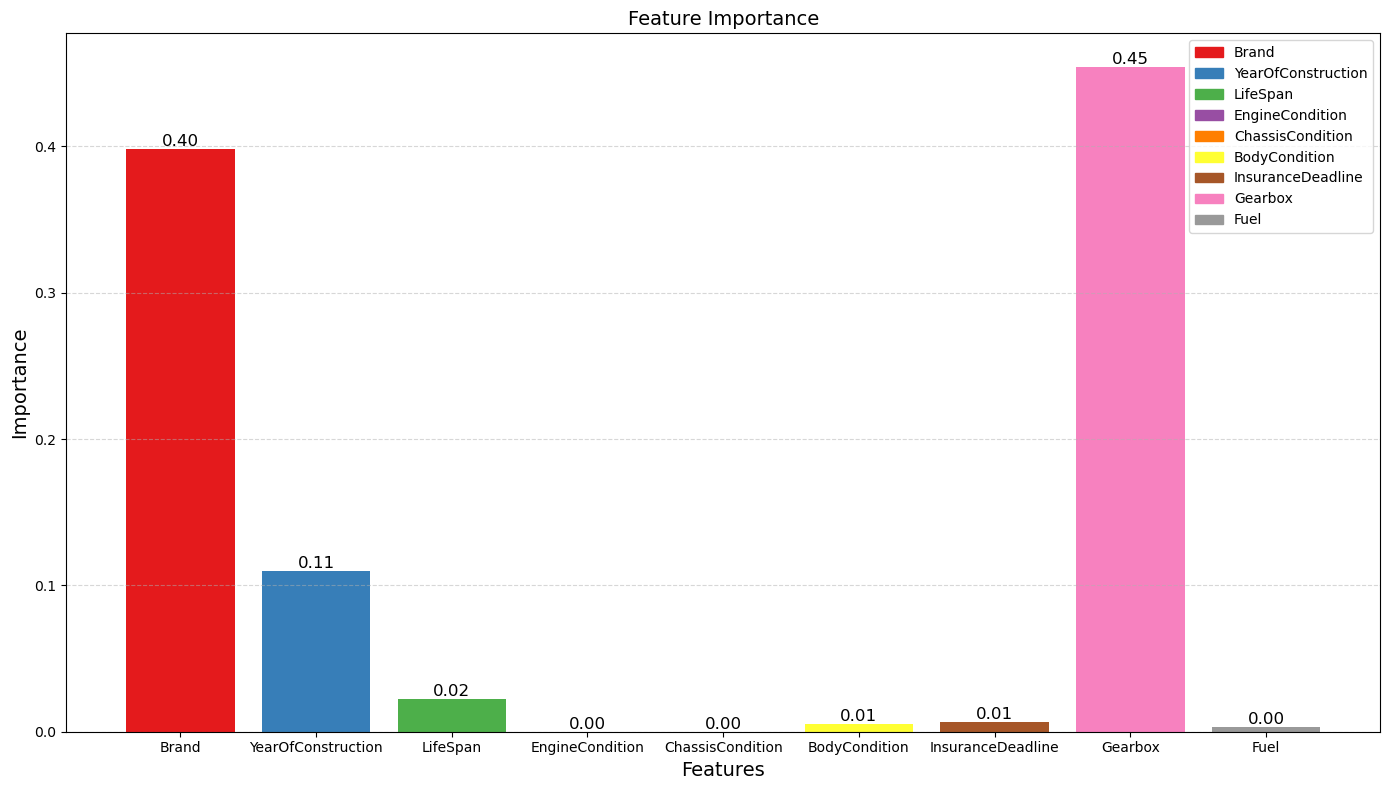

In [20]:
feature_importances = rf.feature_importances_

# Define a color palette with enough colors for the number of features
color_palette = sns.color_palette("Set1", len(X.columns))

# Plot feature importances with color palette
plt.figure(figsize=(14, 8))
plt.bar(X.columns, feature_importances, color=color_palette)

# Customize the plot
plt.xlabel("Features", fontsize=14)
plt.ylabel("Importance", fontsize=14)
plt.title("Feature Importance", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add data labels to the bars
for i, v in enumerate(feature_importances):
    plt.text(i, v, f'{v:.2f}', va='bottom', ha='center', fontsize=12)

# Create a custom legend
legend_labels = X.columns
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color_palette[i]) for i in range(len(X.columns))]
plt.legend(legend_handles, legend_labels, loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()

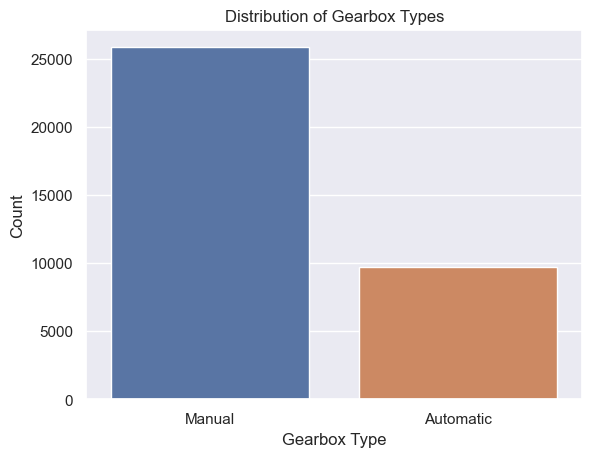

In [30]:
# Assuming df is your DataFrame with the "Gearbox" column
gearbox_counts = df['Gearbox'].value_counts()

# Set the seaborn style
sns.set(style='darkgrid')

# Create the bar plot using seaborn
sns.barplot(x=['Manual', 'Automatic'], y=gearbox_counts.values)

plt.xlabel('Gearbox Type')
plt.ylabel('Count')
plt.title('Distribution of Gearbox Types')
plt.show()

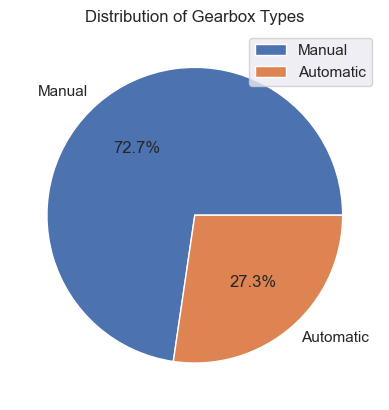

In [31]:
# Set the seaborn style
sns.set(style='darkgrid')

plt.pie(gearbox_counts.values, labels=['Manual', 'Automatic'], autopct='%1.1f%%')
plt.title('Distribution of Gearbox Types')

# Create a legend
legend_labels = ['Manual', 'Automatic']
plt.legend(legend_labels, loc='best')

plt.show()